<a href="https://colab.research.google.com/github/KSaiNihal/KSaiNihal-Time-Series-Forecasting-of-Stock-Prices/blob/main/Stock_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Changing working directory
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')

/content


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA


In [ ]:
TempData = pd.read_csv('/content/drive/MyDrive/Projects/Stock Price(Time Series)/HCLTECH.csv')
TempData.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Data Cleaning
HCLTechStockData = TempData.dropna()


HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)

HCLTechStockData = HCLTechStockData["Prev Close"]['2013-01-01':'2013-12-2']
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

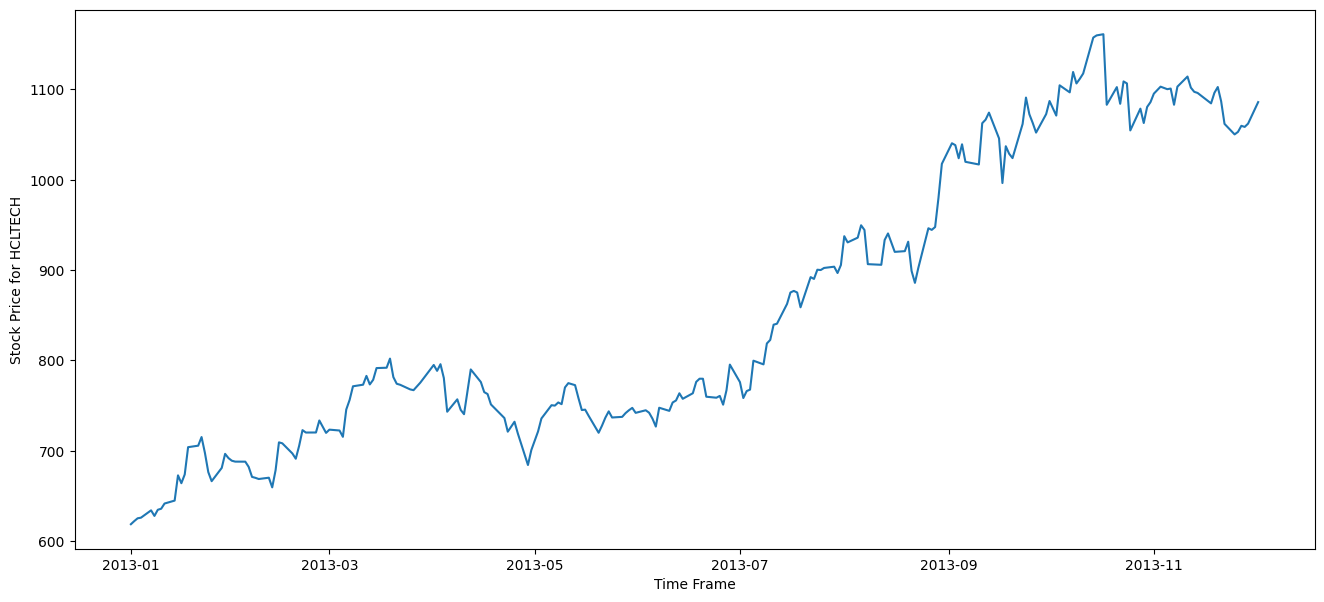

In [ ]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)

In [ ]:
# Checking stationarity

In [ ]:
# Method 1 -  Rolling Statistics
# Method 2 -  Duckey fuller

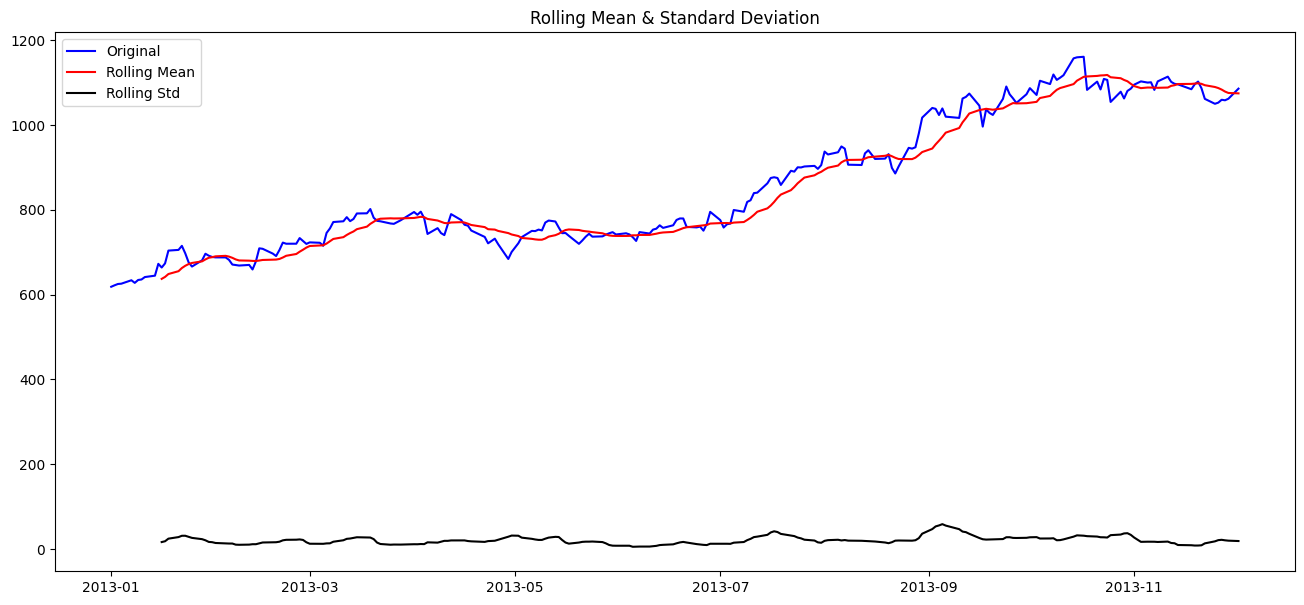

In [ ]:
#Determing rolling statistics
rolLmean = HCLTechStockData.rolling(12).mean()
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# making Series Stationary

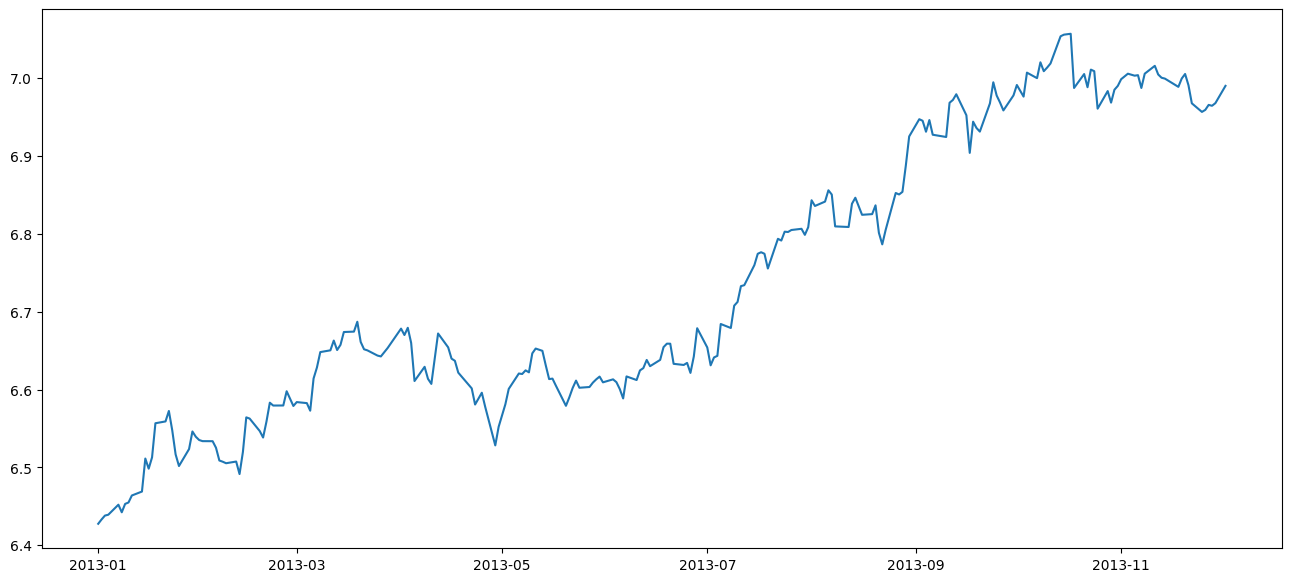

In [ ]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

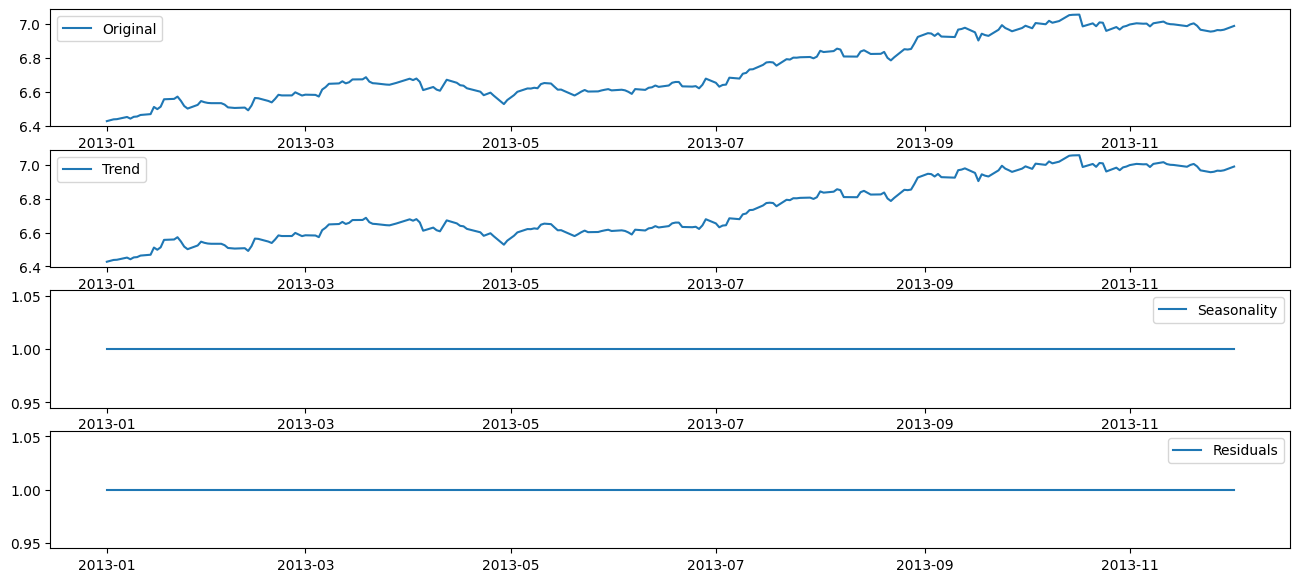

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming ts_log is your time series data
decomposition = seasonal_decompose(ts_log, period=1, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.show()

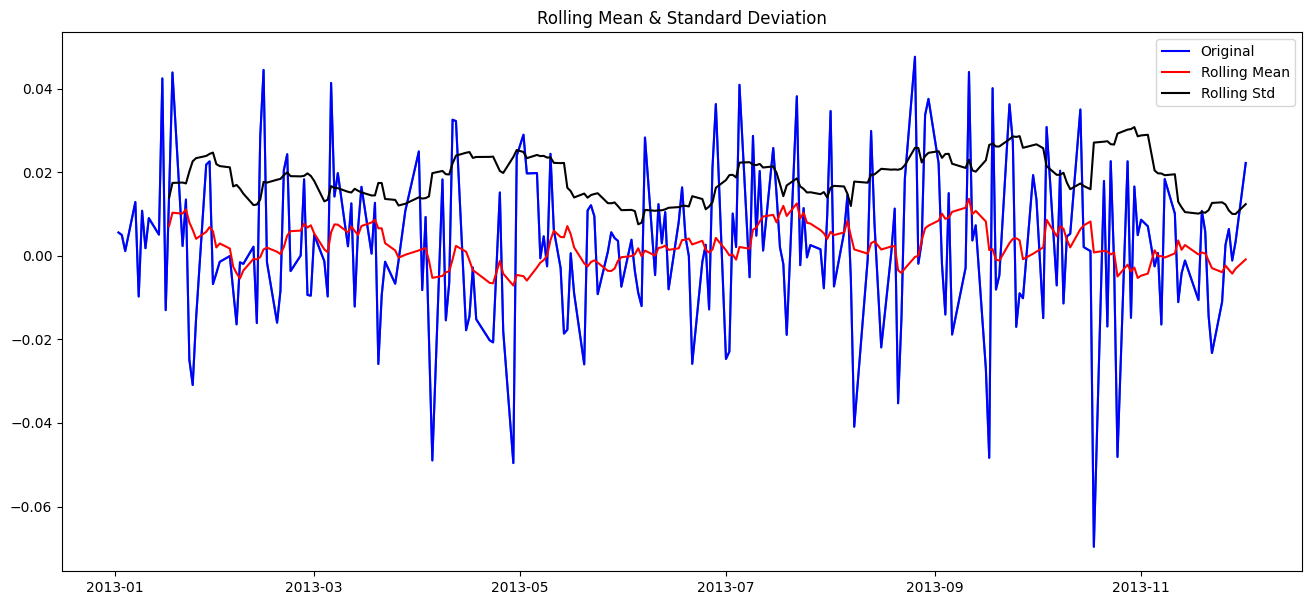

In [ ]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
HCLTechStockData.sort_index(inplace= True)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

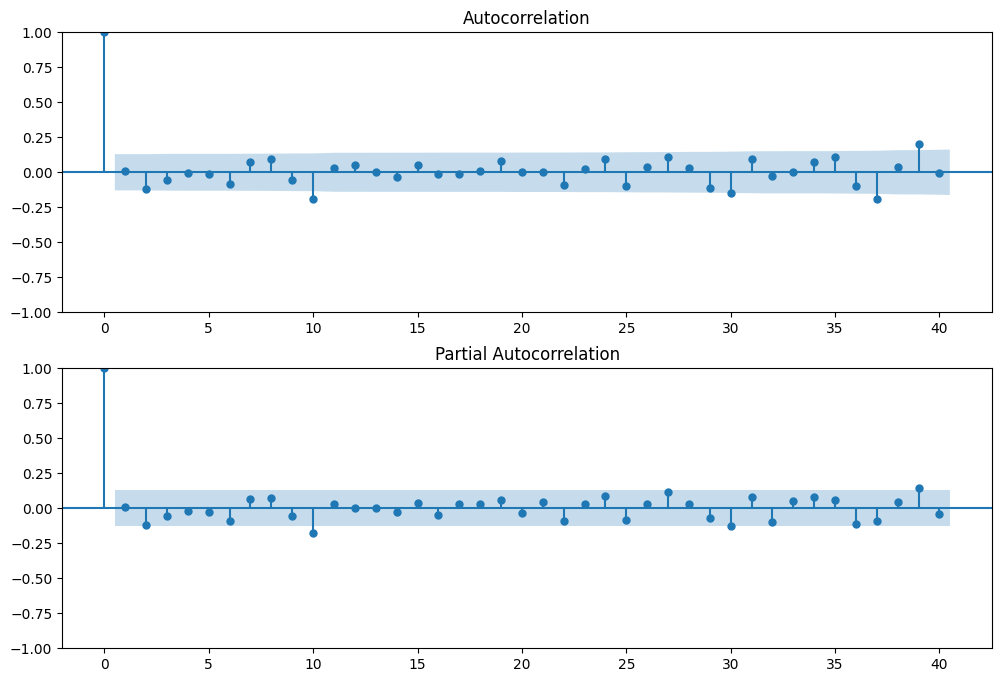

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
type(ts_log_diff)

pandas.core.series.Series

In [ ]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


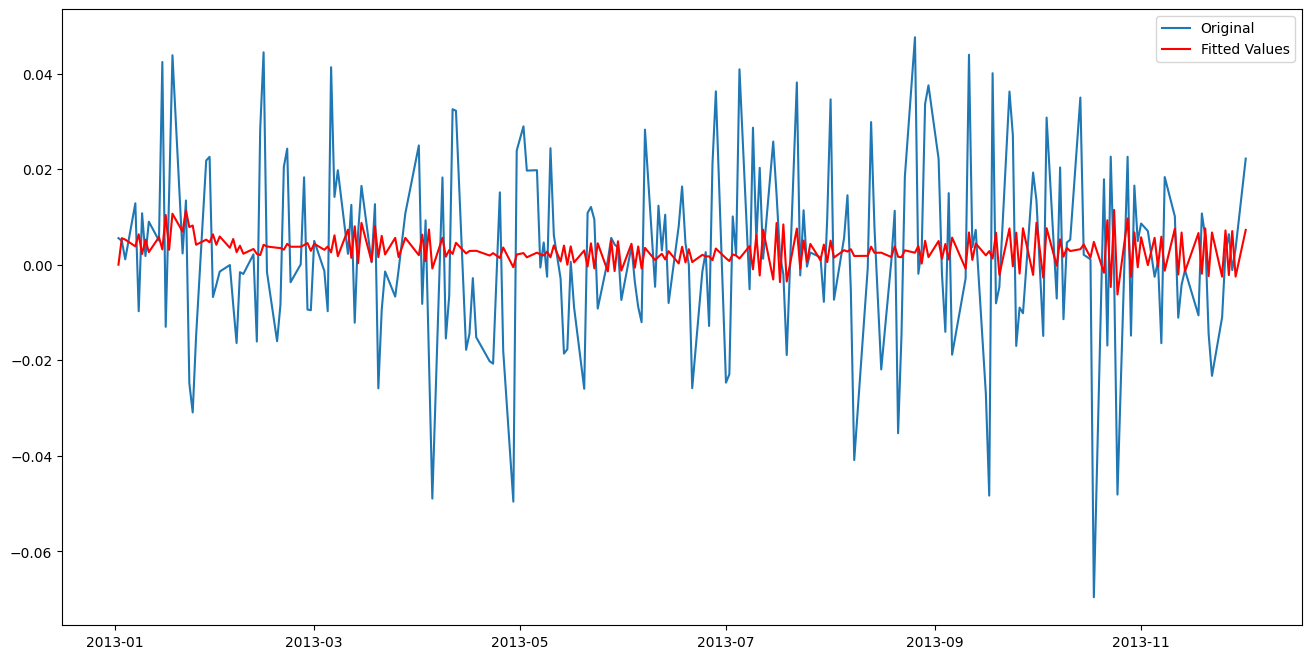

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(16,8))

# Assuming ts_log_diff is your time series data
# Ensure to drop NaN values if any
# ts_log_diff.dropna(inplace=True)

model = ARIMA(ts_log_diff, order=(2,1,2))
results_ARIMA = model.fit()

plt.plot(ts_log_diff, label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values')
plt.legend(loc='best')
plt.show()


# Taking results back to original scale

In [ ]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.005252
2013-01-07    0.003841
2013-01-08    0.006360
dtype: float64


In [ ]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.010813
2013-01-07    0.014653
2013-01-08    0.021014
dtype: float64


In [ ]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2013-01-01    6.427621
2013-01-02    6.427621
2013-01-03    6.433181
2013-01-04    6.438433
2013-01-07    6.442274
dtype: float64

Text(0.5, 1.0, 'RMSE: 93.6190')

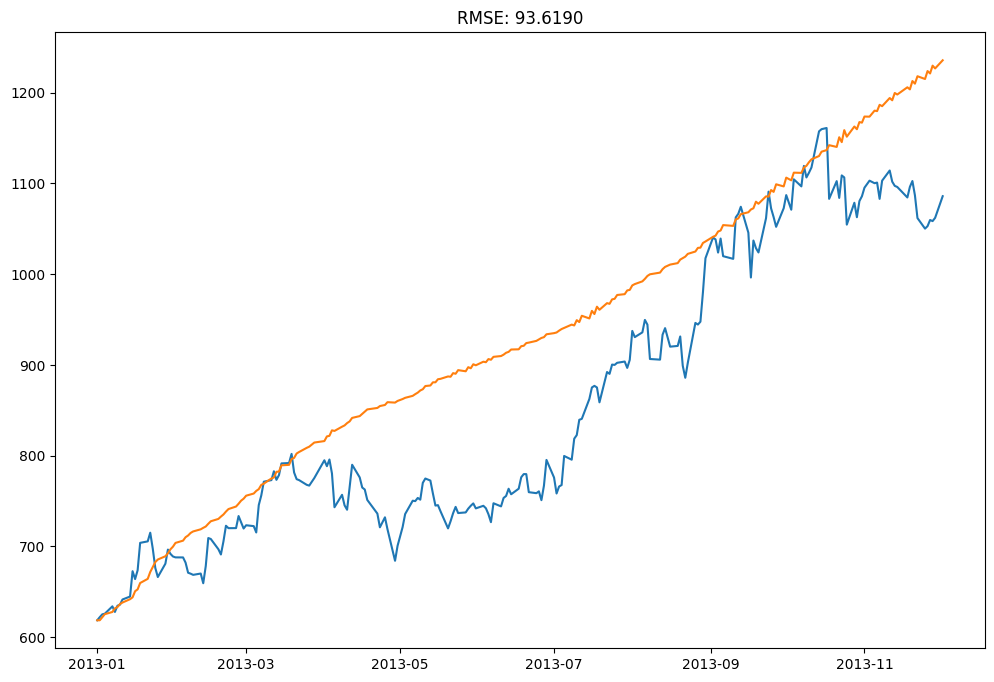

In [ ]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(HCLTechStockData)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-HCLTechStockData)**2)/len(HCLTechStockData)))

In [ ]:
results_ARIMA.predict(10,20)

Date
2013-01-16    0.010408
2013-01-17    0.003115
2013-01-18    0.010672
2013-01-21    0.006916
2013-01-22    0.011318
2013-01-23    0.007879
2013-01-24    0.008202
2013-01-25    0.004170
2013-01-28    0.005245
2013-01-29    0.004681
2013-01-30    0.006345
Name: predicted_mean, dtype: float64

In [ ]:
!pip install pmdarima


In [ ]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p=3,
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [ ]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1158.949, Time=3.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=1.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 6.063 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
rmse_arima=np.sqrt(sum((predictions_ARIMA-HCLTechStockData)**2)/len(HCLTechStockData))
print(rmse_arima)

93.6189921396994


SARIMAX

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=8.13 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-960.962, Time=0.39 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-1024.344, Time=1.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-962.900, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-958.974, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-1032.330, Time=4.45 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=8.83 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-1033.990, Time=3.18 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=-1026.120, Time=0.57 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=-1047.592, Time=8.28 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=5.88 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=i

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


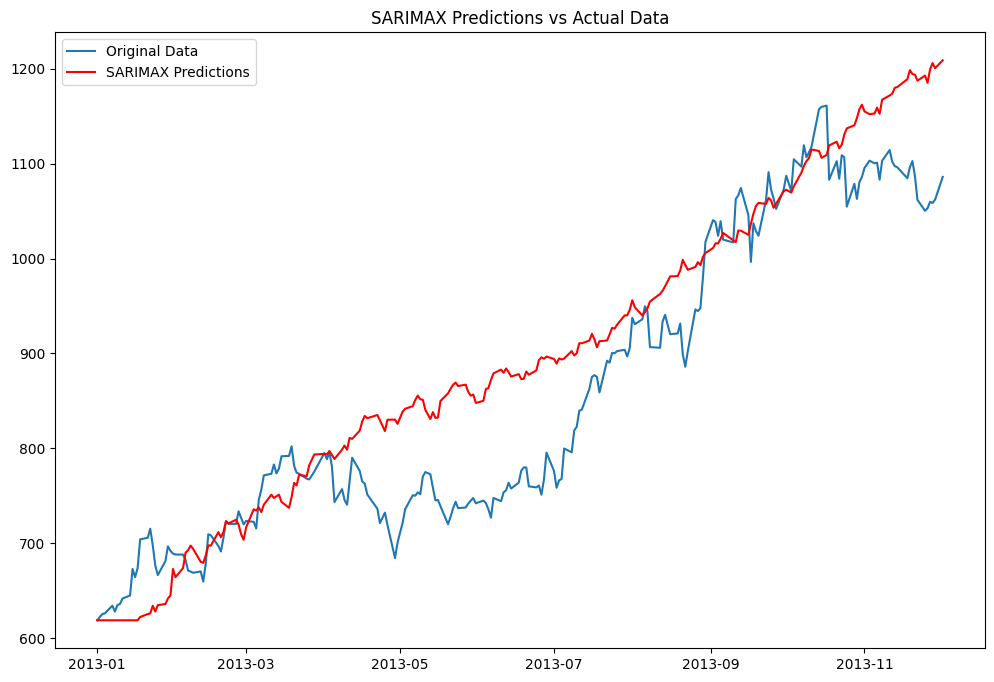

RMSE: 71.6554


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

# Load data (assuming it's already loaded and cleaned as 'HCLTechStockData')
# HCLTechStockData = ...

# Differencing the log-transformed data to make it stationary
ts_log = np.log(HCLTechStockData)
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff = ts_log_diff.dropna()

# Function to find the best SARIMAX model using pmdarima's auto_arima
def sarimax_model(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p=1,
                              start_q=1,
                              max_p=5,
                              max_q=5,
                              start_P=1,
                              start_Q=1,
                              max_P=2,
                              max_Q=2,
                              m=12,  # Assuming monthly data
                              seasonal=True,
                              trace=True,
                              stepwise=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              D=1,
                              max_D=2,
                              max_order=10,
                              test='adf',  # Use ADF test to find optimal differencing term
                              information_criterion='aic')  # Criterion for model selection
    return automodel

# Find the best SARIMAX model
automodel = sarimax_model(ts_log_diff)
print(automodel.summary())

# Fit the best model
model = SARIMAX(ts_log_diff,
                order=automodel.order,
                seasonal_order=automodel.seasonal_order)
results_SARIMAX = model.fit(disp=False)

# Making predictions
pred_start_date = ts_log_diff.index[0]
pred_end_date = ts_log_diff.index[-1]

sarimax_diff_predictions = results_SARIMAX.predict(start=pred_start_date, end=pred_end_date)

# Convert predictions back to original scale
sarimax_diff_predictions_cumsum = sarimax_diff_predictions.cumsum()
sarimax_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
sarimax_log_prediction = sarimax_log_prediction.add(sarimax_diff_predictions_cumsum, fill_value=0)

# Transform predictions back to the original scale
predictions_SARIMAX = np.exp(sarimax_log_prediction)

# Plot the predictions against the actual values
plt.figure(figsize=(12, 8))
plt.plot(HCLTechStockData, label='Original Data')
plt.plot(predictions_SARIMAX, label='SARIMAX Predictions', color='red')
plt.legend(loc='best')
plt.title('SARIMAX Predictions vs Actual Data')
plt.show()

# Calculate and print RMSE
rmse_sarima = np.sqrt(((predictions_SARIMAX - HCLTechStockData) ** 2).mean())
print(f'RMSE: {rmse_sarima:.4f}')


Holt's Linear Trend Method Implementation

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


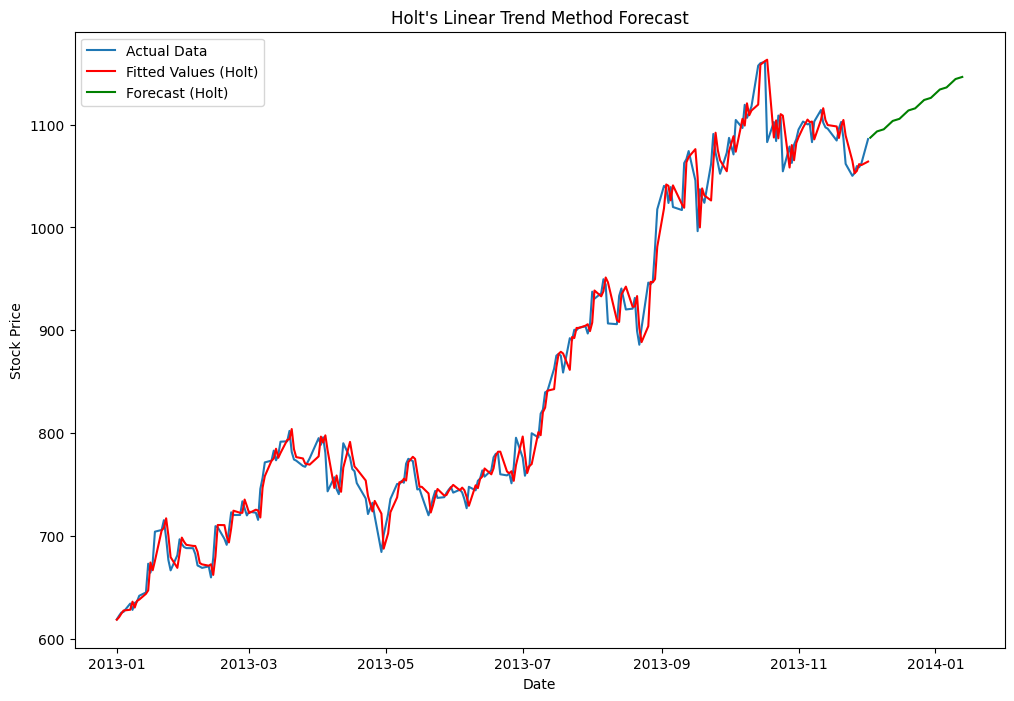

16.647316500983752


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Assuming HCLTechStockData and results_SARIMAX are already defined

# 1. Fit SARIMAX model (assuming you have already done this)
# Example: results_SARIMAX = model.fit()

# 2. Implement Holt's Linear Trend method
model_holt = ExponentialSmoothing(HCLTechStockData, trend='add', damped=False)
fit_model_holt = model_holt.fit()

# 3. Making predictions
forecast_period = 30  # Adjust as needed
forecast_holt = fit_model_holt.forecast(forecast_period)

# 4. Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(HCLTechStockData, label='Actual Data')
plt.plot(fit_model_holt.fittedvalues, label='Fitted Values (Holt)', color='red')
plt.plot(pd.date_range(start=HCLTechStockData.index[-1], periods=forecast_period + 1, freq='B')[1:], forecast_holt, label='Forecast (Holt)', color='green')
plt.title('Holt\'s Linear Trend Method Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

rmse_holt = np.sqrt(mean_squared_error(HCLTechStockData, fit_model_holt.fittedvalues))
print(rmse_holt)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE for Holt-Winters Method: 16.384489857525075


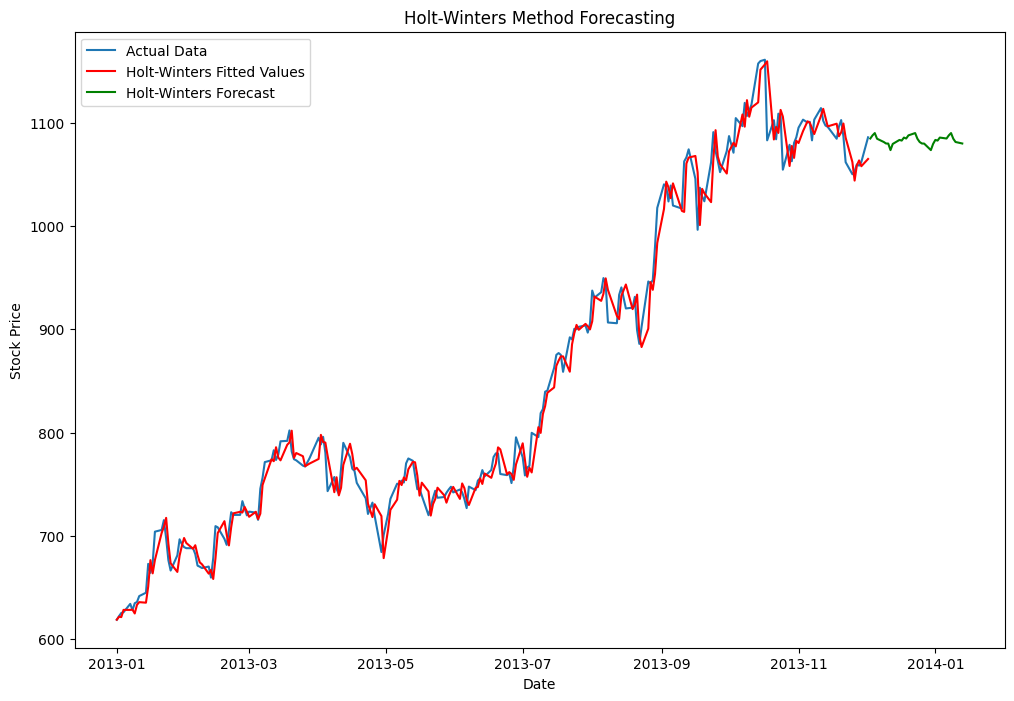

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Assuming HCLTechStockData is already defined as your time series data

# Fit Holt-Winters model
model_hw = ExponentialSmoothing(HCLTechStockData, seasonal='add', seasonal_periods=12)
fit_model_hw = model_hw.fit()

# Making predictions
forecast_period = 30  # Adjust as needed
forecast_hw = fit_model_hw.forecast(forecast_period)

# Compute RMSE
rmse_hw = np.sqrt(mean_squared_error(HCLTechStockData, fit_model_hw.fittedvalues))

# Print RMSE
print(f"RMSE for Holt-Winters Method: {rmse_hw}")

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(HCLTechStockData, label='Actual Data')
plt.plot(fit_model_hw.fittedvalues, label='Holt-Winters Fitted Values', color='red')
plt.plot(pd.date_range(start=HCLTechStockData.index[-1], periods=forecast_period + 1, freq='B')[1:], forecast_hw, label='Holt-Winters Forecast', color='green')
plt.title('Holt-Winters Method Forecasting')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
print("Model\t\tRMSE Value")
print(f"ARIMA\t\t{rmse_arima:.2f}")
print(f"SARIMA\t\t{rmse_sarima:.2f}")
print(f"Holt-Trend\t{rmse_holt:.2f}")
print(f"Holt-Winters\t{rmse_hw:.2f}")

Model		RMSE Value
ARIMA		93.62
SARIMA		71.66
Holt-Trend	16.65
Holt-Winters	16.38
